In [1]:
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Load the dataset

In [5]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',index_col=False)
df=df.drop('customerID',axis=1)

In [6]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1697,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),75.55,4707.85,No
7030,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
3305,Male,1,No,No,38,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,94.75,3653,No
4054,Female,1,No,No,34,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,56.25,1765.95,No
2018,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.30,45.3,Yes


In [7]:
# print the column of dataset for better view

In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# select the labels of the column for label encoding

In [10]:
labels=['gender','Partner','Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges','Churn','Contract']



In [11]:
label_encoder = LabelEncoder()

for column in labels:
    df[column] = label_encoder.fit_transform(df[column])

In [12]:
# Converting the object type to integer

In [13]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [14]:
df.info()
# check all the input columns are encodded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [15]:
# lets the the dataset after encoding

In [16]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,137,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,306.60,1


In [17]:
# Check is there is any missing values in dataset collumns

In [18]:
print(f'check isf there is any  missing values in df\n{df.isna().sum()}')

check isf there is any  missing values in df
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [19]:
# we have 11 missing values is TotalCharges
# for now im filling with 0

In [20]:
df['TotalCharges']=df['TotalCharges'].fillna(0)

In [21]:
# Lets check the dataset is balenced or not

In [22]:
class_distribution=df['Churn'].value_counts()
print(class_distribution)
imbalance_ratio = max(class_distribution) / min(class_distribution)
print("Imbalance Ratio:", imbalance_ratio)

0    5174
1    1869
Name: Churn, dtype: int64
Imbalance Ratio: 2.7683253076511503


the dataset appears to be imbalanced. The majority class "No" has 5174 instances, while the minority class "Yes" has 1869 instances. The imbalance ratio, calculated as the count of the majority class divided by the count of the minority class, is approximately 2.77.

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
X=df.drop('Churn',axis=1)
y=df['Churn']

smote=SMOTE(random_state=42)

X_resamples,y_resampled=smote.fit_resample(X,y)
print("the class distribution before resample")
print(y.value_counts())
print("The class distribution after resample")
print("\nClass Distribution After Resampling:")
print(pd.Series(y_resampled).value_counts())

the class distribution before resample
0    5174
1    1869
Name: Churn, dtype: int64
The class distribution after resample

Class Distribution After Resampling:
0    5174
1    5174
Name: Churn, dtype: int64


In [26]:
# Reshaping the values

In [27]:
MonthlyCharges=X_resamples['MonthlyCharges'].values.reshape(-1,1)
X_resamples['MonthlyCharges']=scaler.fit_transform(MonthlyCharges)

TotalCharges=X_resamples['TotalCharges'].values.reshape(-1,1)
X_resamples['TotalCharges']=scaler.fit_transform(TotalCharges)



In [28]:
X_resamples

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,-1.282789,-0.926350
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,-0.510953,-0.073087
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,-0.645374,-0.890424
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,-1.013947,-0.095455
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,-0.010127,-0.870465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,0,0,0,4,1,0,1,0,0,0,0,0,2,0,1,2,0.330262,-0.793633
10344,1,0,0,0,3,0,1,0,0,1,0,1,0,0,0,1,3,-1.111511,-0.887817
10345,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,0,2,-0.931560,-0.742780
10346,0,0,0,0,8,1,0,2,1,1,1,1,1,1,0,0,2,-1.532118,-0.861509


In [29]:
X_train,X_test,y_train,y_test=train_test_split(X_resamples,y_resampled)

In [30]:
print(len(X_train))
print(len(X_test))

7761
2587


In [31]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=10000)

In [32]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [33]:
pred=model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,precision_score,classification_report

In [35]:
print(accuracy_score(y_test,pred))

0.7978353304986471


In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1279
           1       0.78      0.83      0.81      1308

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587



In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [38]:
# Create a list of models to iterate over to find which model is good for this dataset

In [39]:
models = [
    LogisticRegression(max_iter=10000),
    RandomForestClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    GaussianNB()
]
for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f"Accuracy for {model.__class__.__name__}: {accuracy}")

Accuracy for LogisticRegression: 0.7978353304986471
Accuracy for RandomForestClassifier: 0.8484731349052957
Accuracy for SVC: 0.7831465017394665
Accuracy for DecisionTreeClassifier: 0.7908774642442984
Accuracy for KNeighborsClassifier: 0.7955160417471975
Accuracy for GaussianNB: 0.7711635098569772


In [40]:
# i find the RandomForestClassifer is performing well by the accuracy

In [41]:
# {'bootstrap': False, 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

In [42]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
predicted_labels = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8446076536528798


In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [44]:
kfold=KFold(n_splits=10,shuffle=True,random_state=42)
scores=cross_val_score(rf_classifier,X_train,y_train,scoring='accuracy')
for i ,score in enumerate(scores):
    print(f'Fold{i+1} accuracy : {score}')
mean_accu=scores.mean()
print(f'Mean Accuracy : {mean_accu}')

Fold1 accuracy : 0.8473921442369607
Fold2 accuracy : 0.8266752577319587
Fold3 accuracy : 0.8447164948453608
Fold4 accuracy : 0.845360824742268
Fold5 accuracy : 0.8440721649484536
Mean Accuracy : 0.8416433773010004


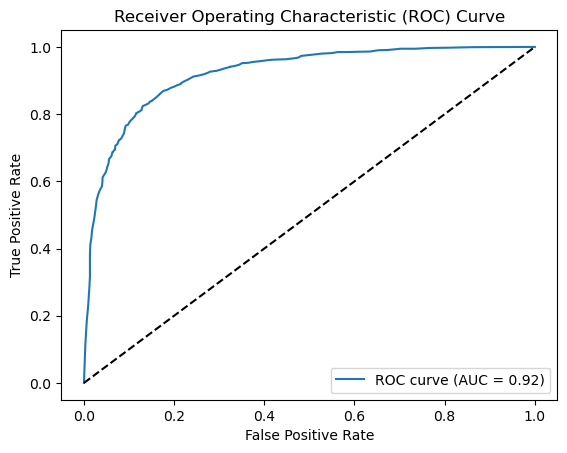

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
